<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A_20_Comparison_of_Machine_Learning_Algorithms_to_Classify_Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/drive/MyDrive/mos_data/penguins.csv")

## **Task 1: Subset out the following columns from the dataset: “species”,“bill_length_mm”, “bill_depth_mm”, “flipper_length_mm”, “body_mass_g”, and “sex”. In the models, “species” is the dependent variable and should be treated as nominal data. All predictor variables are continuous other than “sex”, which should be treated as a nominal variable. Remove any rows that have missing data in any column.**

In [ ]:
df = df.drop(['Unnamed: 0', 'island', 'year'],axis=1) # drop columns
df.dropna(inplace=True) # drop null values row wise
df[["species_encode","sex_encode"]] = df[['species','sex']].apply(LabelEncoder().fit_transform) # convert to label encoder


In [ ]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encode,sex_encode
0,Adelie,39.1,18.7,181.0,3750.0,male,0,1
1,Adelie,39.5,17.4,186.0,3800.0,female,0,0
2,Adelie,40.3,18.0,195.0,3250.0,female,0,0
4,Adelie,36.7,19.3,193.0,3450.0,female,0,0
5,Adelie,39.3,20.6,190.0,3650.0,male,0,1
...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male,1,1
340,Chinstrap,43.5,18.1,202.0,3400.0,female,1,0
341,Chinstrap,49.6,18.2,193.0,3775.0,male,1,1
342,Chinstrap,50.8,19.0,210.0,4100.0,male,1,1


In [ ]:
df.species.unique() # categorical 

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
df.species_encode.unique()# label encoded

array([0, 2, 1])

## **Task 2: Generate grouped box plots to show the distribution of each continuous predictor variable within each species. Also, differentiate the data by sex within each species. Based on these visualizations, do the penguin species appear to have different characteristics? Do characteristics vary by sex, indicating that sex should be included as 2 a predictor variable? What variables seem most predictive? Generally, do you anticipate being able to separate the species with high accuracy?**

In [ ]:
df.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'species_encode', 'sex_encode'],
      dtype='object')

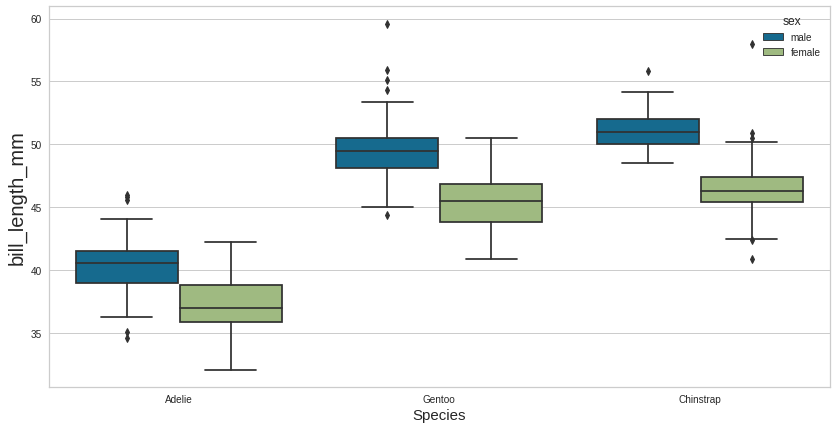

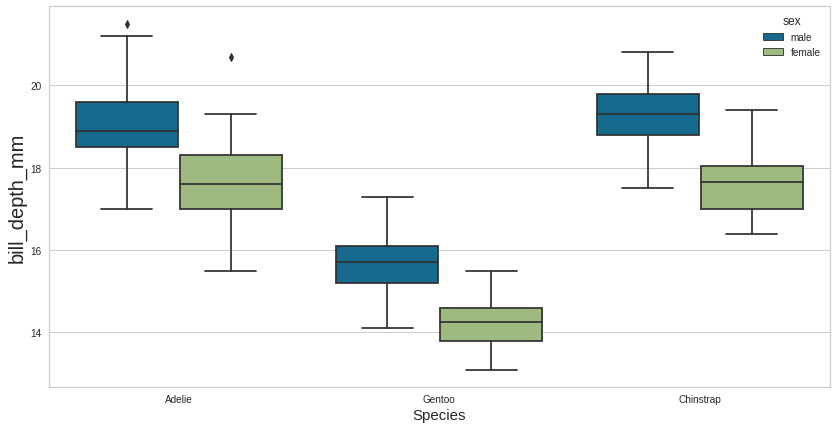

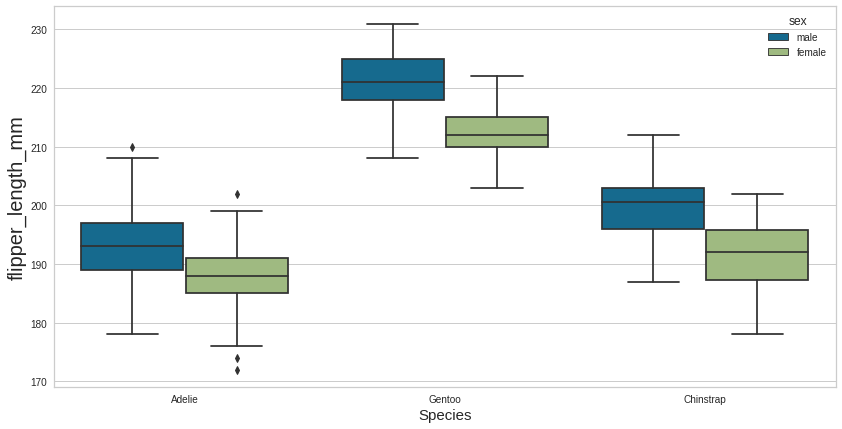

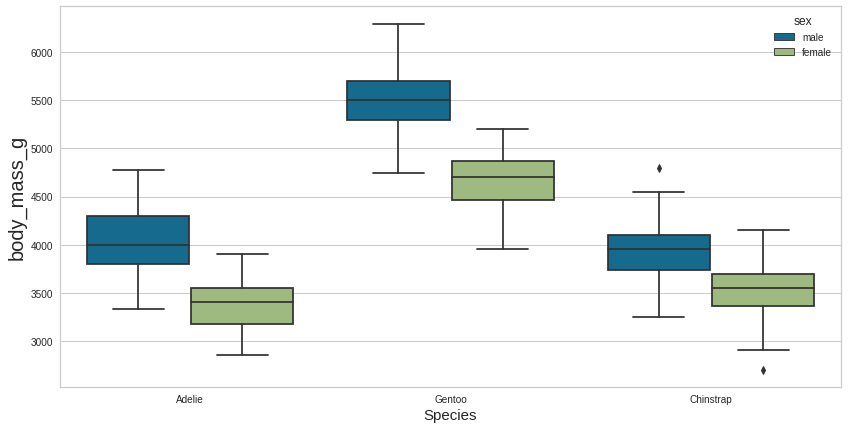

In [ ]:
a= df[[ 'species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g','sex']]
for i in a.columns[1: ]:
  if i =='sex':
    break
  fig, ax = plt.subplots(figsize=(14,7))
  sns.boxplot(data=a,  x= 'species', y=i, hue='sex',ax=ax)
  # plt.title(i, size=20)
  ax.set_ylabel(i,size=20)
  ax.set_xlabel("Species", size=15)
  plt.show()


## **Task 3. Split the data into separate training and testing sets stratified by the species type.**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[[ 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g','sex_encode']]
y = df['species_encode']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249, 5), (84, 5), (249,), (84,))

## **Task 4. Center and scale all the continuous predictor variables. This is required for using the Support Vector Machine and k-Nearest Neighbor algorithms. Also, create dummy variables from the “sex” variable**

In [ ]:
X_test.columns[:-1] # continous predictor columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_test.columns[:-1]]  = scaler.fit_transform(X_test[X_test.columns[:-1]])

## **Task 5. Use the training partition to train Random Forest, Support Vector Machine, and k-Nearest Neighbor models. For Random Forest, use 100 trees and set the number of predictor variables available for splitting at each node hyperparameter to 3. Support  Vector Machines can use the default hyperparameters. For k-Nearest Neighbor, set the number of neighbors to 11. Note that it would be best to tune the hyperparameters to offer a fairer comparison of the algorithms. However, we are not asking you to do so here to save time.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

neigh = KNeighborsClassifier(n_neighbors=11)
nb_modle = neigh.fit(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
rnd_model = clf.fit(X_train, y_train)

svc = SVC( )
svm_model = svc.fit(X_train, y_train)

## **Task 6. Use the train models to predict to the withheld validation data. Use the results to create Confusion Matrices and the Overall Accuracy metrics. Discuss your results. How do the algorithms compare for this specific problem? Were the species generally separated with high or low accuracy?**

In [ ]:
from sklearn.metrics import accuracy_score

nb_pred = nb_modle.predict(X_test)
rnd_pred = rnd_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

a = accuracy_score(y_test,nb_pred )
b = accuracy_score(y_test,rnd_pred )
c = accuracy_score(y_test,svm_pred )
a = pd.DataFrame({"Overall Accuracy":{"K-nearest Neighbor":a,"Random Forest":b,"Support vector Machine":c}})
a

,Overall Accuracy
K-nearest Neighbor,0.988095
Random Forest,0.988095
Support vector Machine,1.000000


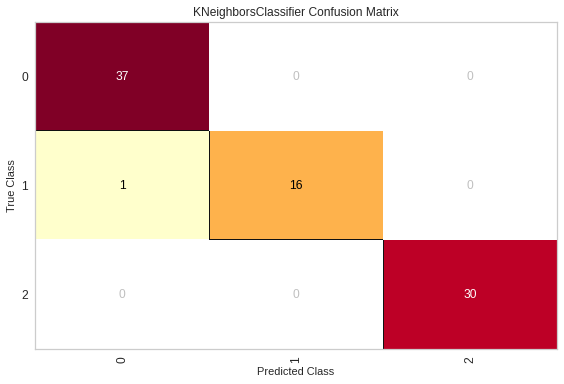

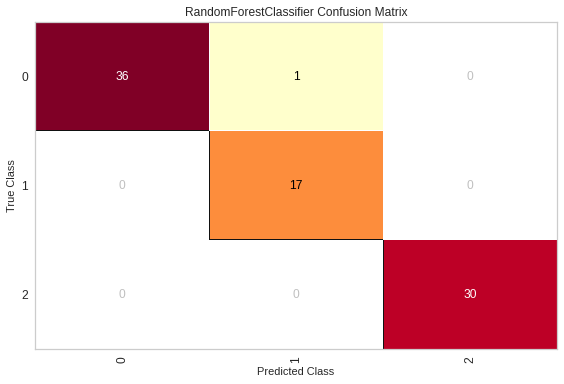

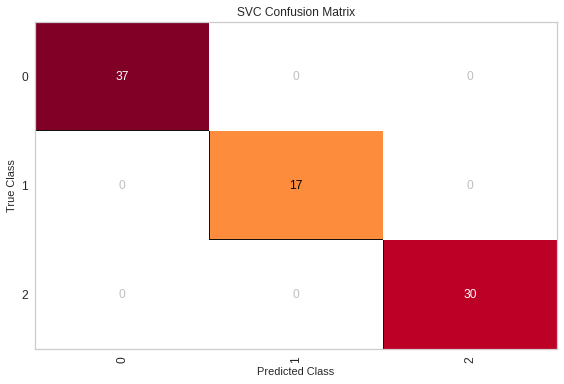

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
def confusion(X_train,y_train,X_test,y_test):
  cm = ConfusionMatrix(neigh, classes=[0,1,2])
  cm1 = ConfusionMatrix(clf, classes=[0,1,2])
  cm2 = ConfusionMatrix(svc, classes=[0,1,2])

  for i in [cm,cm1,cm2]:
    i.fit(X_train, y_train)
    i.score(X_test, y_test)
    i.show();

confusion(X_train,y_train, X_test, y_test)

In SVM the species generally separated with high accuracy  

## **Task 7. Repeat the algorithm comparison. However, this time only use the  “body_mass_g” as a predictor variable. How do the three algorithms compare if only  one predictor variable is provided? How does the performance using only one predictor variable compare to that obtained when using the entire set of predictors?**

In [ ]:
#----------------TRAINING MODEL WITH ONE PREDICTOR---------
#==========================================================
#----------------------------------------------------------

neigh = KNeighborsClassifier(n_neighbors=11)
nb_modle = neigh.fit(X_train['body_mass_g'].values.reshape(-1, 1), y_train)

clf = RandomForestClassifier(max_depth=100, random_state=0)
rnd_model = clf.fit(X_train['body_mass_g'].values.reshape(-1, 1), y_train)

svc = SVC( )
svm_model = svc.fit(X_train['body_mass_g'].values.reshape(-1, 1), y_train)

#------------------MAKING PREDICTION ------------------------
#============================================================
#------------------------------------------------------------

nb_pred = nb_modle.predict(X_test['body_mass_g'].values.reshape(-1, 1))
rnd_pred = rnd_model.predict(X_test['body_mass_g'].values.reshape(-1, 1))
svm_pred = svm_model.predict(X_test['body_mass_g'].values.reshape(-1, 1))

a = accuracy_score(y_test,nb_pred )
b = accuracy_score(y_test,rnd_pred )
c = accuracy_score(y_test,svm_pred )
a = pd.DataFrame({"Overall Accuracy for one Predictor":{"K-nearest Neighbor":a,"Random Forest":b,"Support vector Machine":c}})
a

,Overall Accuracy for one Predictor
K-nearest Neighbor,0.690476
Random Forest,0.678571
Support vector Machine,0.714286


**Still the SVM win but accuracy is low as compared to previous models because previous models use multiple predictor columns and these models use one predictor so that the reason the dependent variable depend on the power of predictors.**